
## Assignment 2
--------


*   Selsabeel Asim Elbagir 20210714
*   Roaa Fathi Nada 20210140






Let's pick a random linear equation (Y = MX + C) that we will try to have our code find.

Y = 10.5X + 3

W = 10.5

C = 3

In [ ]:
import numpy as np
np.random.seed(41) # to make this code reproducible

# Define the linear equation: Y = MX + C
M = 10.5
C = 3

# Define a function to generate Y and Y_noisy
def generateY(X):
    Y = M * X + C
    Y_noisy = Y + np.random.randint(-100, 100) / 50
    return Y, Y_noisy

In [ ]:
X = np.array([4,6,2,5,3])
# Generate Y and Y_noisy using numpy array comprehension
Y, Y_noisy = np.array([generateY(x) for x in X]).T
print(Y)
print(Y_noisy)
print(Y.shape)
print(X.shape)
print(X)

[45.  66.  24.  55.5 34.5]
[46.84 67.26 24.8  55.1  33.8 ]
(5,)
(5,)
[4 6 2 5 3]


In [ ]:
from sklearn.preprocessing import add_dummy_feature
X_b = add_dummy_feature(X.reshape(-1, 1)) # add x0 = 1 to each instance
print(X_b)

[[1. 4.]
 [1. 6.]
 [1. 2.]
 [1. 5.]
 [1. 3.]]


In [ ]:
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ Y
theta_best

array([ 3. , 10.5])

In [ ]:
theta_noisy = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ Y_noisy
theta_noisy

array([ 3.072, 10.622])

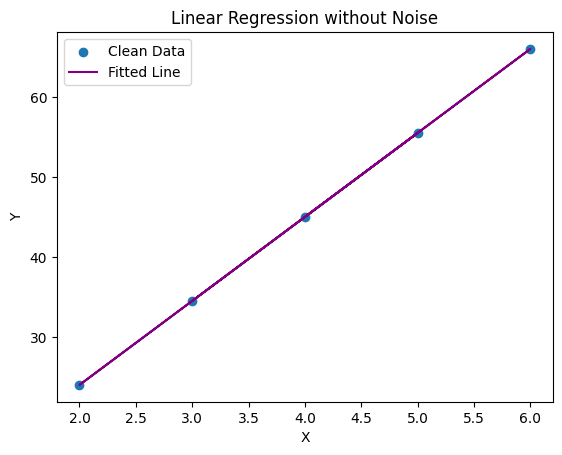

In [ ]:
import matplotlib.pyplot as plt
# Plot the original data and the fitted line
plt.scatter(X, Y, label='Clean Data')
plt.plot(X, X_b.dot(theta_best), color='purple', label='Fitted Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Linear Regression without Noise')
plt.show()

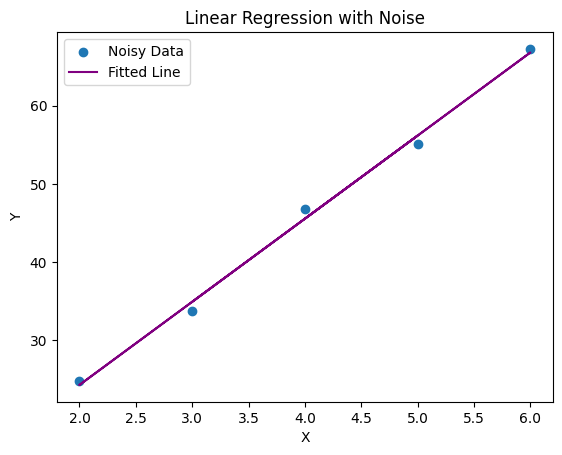

In [ ]:
# Plot the original data and the fitted line
plt.scatter(X, Y_noisy, label='Noisy Data')
plt.plot(X, X_b.dot(theta_noisy), color='purple', label='Fitted Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Linear Regression with Noise')
plt.show()

In [ ]:
output = np.dot(X_b, theta_noisy) - Y_noisy
classes = np.where(output >= 0, 1, -1)
print("Difference between Predicted and Actual Y_noisy:", output)
print("Classes based on the difference:")
print(classes)

Difference between Predicted and Actual Y_noisy: [-1.28  -0.456 -0.484  1.082  1.138]
Classes based on the difference:
[-1 -1 -1  1  1]
